Problem statement:
The e-commerce company aims to leverage data-driven insights to enhance customer acquisition, retention, and revenue optimization. The following analysis will be conducted to understand key business trends and improve decision-making.

Dataset link: https://drive.google.com/drive/folders/1Qt1HfSoTyCKiyDy2frR-hYOT9UvfwGq7?usp=sharing

Dataset description: Dataset Description.docx


In [1]:
import pandas as pd

# Relative path: one folder back (..), then into 'dataset' folder
file_path = '../dataset/sample.xlsx'

# Replace 'your_file.xlsx' with your actual file path
customers_data = pd.read_excel('../dataset/CustomersData.xlsx', sheet_name='Customers')  # You can specify the sheet

tax_amount_data = pd.read_excel('../dataset/Tax_amount.xlsx', sheet_name='GSTDetails')  # You can specify the sheet

# Replace 'your_file.csv' with your actual file path
discount_coupon_data = pd.read_csv('../dataset/Discount_Coupon.csv')
marketing_spend_data = pd.read_csv('../dataset/Marketing_Spend.csv')
online_sales_data = pd.read_csv('../dataset/Online_Sales.csv')



In [2]:
print(online_sales_data.head(2))

   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679         1/1/2019  GGOENEBJ079499   
1       17850           16680         1/1/2019  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          Used  


In [3]:
# online_sales_data.info()
# customers_data.info()
# discount_coupon_data.info()
# tax_amount_data.info()
# marketing_spend_data.info()


In [4]:
print(customers_data.head(2))

   CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43


In [5]:
print(tax_amount_data.head())

  Product_Category   GST
0         Nest-USA  0.10
1           Office  0.10
2          Apparel  0.18
3             Bags  0.18
4        Drinkware  0.18


In [6]:
print(discount_coupon_data.head())

  Month Product_Category Coupon_Code  Discount_pct
0   Jan          Apparel      SALE10            10
1   Feb          Apparel      SALE20            20
2   Mar          Apparel      SALE30            30
3   Jan         Nest-USA      ELEC10            10
4   Feb         Nest-USA      ELEC20            20


In [7]:
print(marketing_spend_data.head())

       Date  Offline_Spend  Online_Spend
0  1/1/2019           4500       2424.50
1  1/2/2019           4500       3480.36
2  1/3/2019           4500       1576.38
3  1/4/2019           4500       2928.55
4  1/5/2019           4500       4055.30



Business questions:
1. Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?

Insights:

✅ Option 1: Use customers_data (with Tenure_Months)
This is the most accurate for acquisition analysis, as it tells you how long each customer has been active.

✅ Option 2: Use online_sales_data (first transaction date per customer)
Useful if Tenure_Months is missing or you want to cross-validate.



📈 Highest acquisition (via first purchase): 2019-01 with 215 customers
📉 Lowest acquisition (via first purchase): 2019-11 with 68 customers


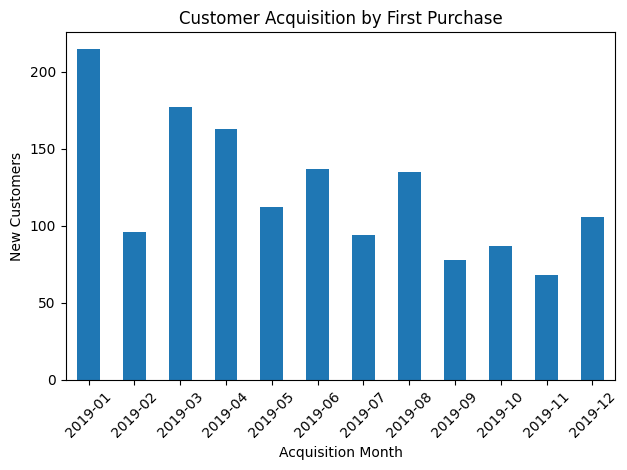

In [8]:
import matplotlib.pyplot as plt
# Convert Transaction_Date to datetime
online_sales_data['Transaction_Date'] = pd.to_datetime(online_sales_data['Transaction_Date'])

# Find first purchase date per customer
first_purchase = online_sales_data.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_purchase['Acquisition_Month'] = first_purchase['Transaction_Date'].dt.to_period('M')

# Count how many customers first purchased in each month
monthly_acquisition = first_purchase['Acquisition_Month'].value_counts().sort_index()

# Identify high and low months
max_month = monthly_acquisition.idxmax()
min_month = monthly_acquisition.idxmin()

print(f"📈 Highest acquisition (via first purchase): {max_month} with {monthly_acquisition[max_month]} customers")
print(f"📉 Lowest acquisition (via first purchase): {min_month} with {monthly_acquisition[min_month]} customers")

# Plot the acquisition trend
monthly_acquisition.plot(kind='bar', title='Customer Acquisition by First Purchase')
plt.xlabel("Acquisition Month")
plt.ylabel("New Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights from the Plot:

a. Higher Acquisition Months:

January (2019-01) has the highest acquisition rate with 215 new customers.

b. Lower Acquisition Months:

February (2019-02) has the lowest acquisition rate with 96 new customers.

c. Mid-tier Acquisition:

March (2019-03) has a moderate acquisition rate with 177 new customers.



2. Analyze the data to determine if certain months consistently show higher or lower acquisition rates. How can the company capitalize on high-performing months and improve performance during slower periods?

Identify High and Low Performing Months
Now analyze the values in monthly_acquisition:

Sort to find peak months (e.g., holiday season, back-to-school).

Identify slower months (e.g., mid-year slumps).

In [9]:
print(monthly_acquisition.head())


Acquisition_Month
2019-01    215
2019-02     96
2019-03    177
2019-04    163
2019-05    112
Freq: M, Name: count, dtype: int64


In [10]:
monthly_acquisition

Acquisition_Month
2019-01    215
2019-02     96
2019-03    177
2019-04    163
2019-05    112
2019-06    137
2019-07     94
2019-08    135
2019-09     78
2019-10     87
2019-11     68
2019-12    106
Freq: M, Name: count, dtype: int64

In [12]:
# Convert the index to Period[M] if it's not already
if not isinstance(monthly_acquisition.index, pd.PeriodIndex):
    monthly_acquisition.index = monthly_acquisition.index.to_period('M')

# Convert Series to DataFrame for merging
monthly_acquisition_df = monthly_acquisition.reset_index()
monthly_acquisition_df.columns = ['Month', 'New_Customers']

In [13]:
average = monthly_acquisition.mean()
print(f"Average new customers per month: {average:.2f}")
high_months = monthly_acquisition[monthly_acquisition > average]
low_months = monthly_acquisition[monthly_acquisition < average]

print("High acquisition months:")
print(high_months)

print("Low acquisition months:")
print(low_months)



Average new customers per month: 122.33
High acquisition months:
Acquisition_Month
2019-01    215
2019-03    177
2019-04    163
2019-06    137
2019-08    135
Freq: M, Name: count, dtype: int64
Low acquisition months:
Acquisition_Month
2019-02     96
2019-05    112
2019-07     94
2019-09     78
2019-10     87
2019-11     68
2019-12    106
Freq: M, Name: count, dtype: int64


In [17]:
# average = monthly_acquisition['New_Customers'].mean()
# high_months = monthly_acquisition[monthly_acquisition['New_Customers'] > average]
# low_months = monthly_acquisition[monthly_acquisition['New_Customers'] < average]

In [14]:
print(marketing_spend_data['Date'].head())
print(marketing_spend_data['Date'].dtype)


0    1/1/2019
1    1/2/2019
2    1/3/2019
3    1/4/2019
4    1/5/2019
Name: Date, dtype: object
object


In [20]:
# Convert Acquisition_Month to period
# monthly_acquisition['Month'] = monthly_acquisition['Acquisition_Month'].astype('period[M]')

# # Make sure marketing data is also period[M]
# marketing_spend_data['Date'] = pd.to_datetime(marketing_spend_data['Date'].astype(str), errors='coerce')
# marketing_spend_data['Month'] = marketing_spend_data['Date'].dt.to_period('M')

# # Aggregate spend per month
# monthly_spend = marketing_spend_data.groupby('Month')[['Online_Spend', 'Offline_Spend']].sum().reset_index()

# # Merge on 'Month'
# merged_df = pd.merge(monthly_acquisition, monthly_spend, on='Month', how='left')
# Convert 'Date' to Period[M]
marketing_spend_data['Month'] = marketing_spend_data['Date'].dt.to_period('M')

# Merge DataFrames on 'Month'
merged_df = pd.merge(monthly_acquisition_df, marketing_spend_data[['Month', 'Online_Spend', 'Offline_Spend']],
                     on='Month', how='left')

print(merged_df)


       Month  New_Customers  Online_Spend  Offline_Spend
0    2019-01            215       2424.50           4500
1    2019-01            215       3480.36           4500
2    2019-01            215       1576.38           4500
3    2019-01            215       2928.55           4500
4    2019-01            215       4055.30           4500
..       ...            ...           ...            ...
360  2019-12            106       3396.87           4000
361  2019-12            106       3246.84           4000
362  2019-12            106       2546.58           4000
363  2019-12            106        674.31           4000
364  2019-12            106       2058.75           4000

[365 rows x 4 columns]


In [21]:
print(merged_df.corr(numeric_only=True))


               New_Customers  Online_Spend  Offline_Spend
New_Customers       1.000000     -0.079286       0.002041
Online_Spend       -0.079286      1.000000       0.351122
Offline_Spend       0.002041      0.351122       1.000000


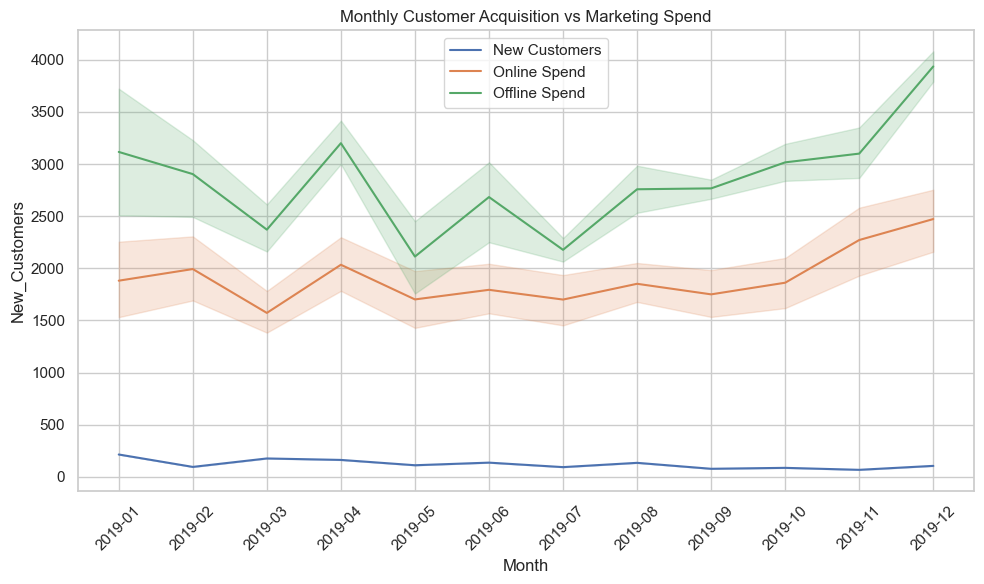

In [22]:
# Convert 'Month' to string so Seaborn can plot it
merged_df['Month'] = merged_df['Month'].astype(str)

# Now plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Month', y='New_Customers', label='New Customers')
sns.lineplot(data=merged_df, x='Month', y='Online_Spend', label='Online Spend')
sns.lineplot(data=merged_df, x='Month', y='Offline_Spend', label='Offline Spend')
plt.xticks(rotation=45)
plt.title('Monthly Customer Acquisition vs Marketing Spend')
plt.legend()
plt.tight_layout()
plt.show()


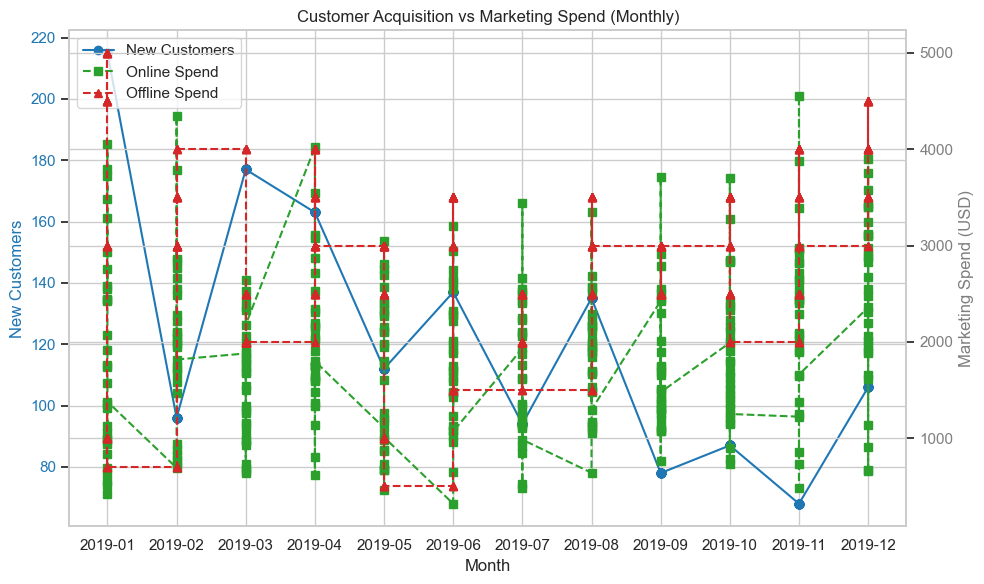

In [23]:


import matplotlib.pyplot as plt

# Ensure Month is in string format
merged_df['Month'] = merged_df['Month'].astype(str)

# Initialize plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line 1: New Customers
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('New Customers', color=color)
ax1.plot(merged_df['Month'], merged_df['New_Customers'], marker='o', color=color, label='New Customers')
ax1.tick_params(axis='y', labelcolor=color)

# Line 2 & 3: Marketing Spend (second Y axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Marketing Spend (USD)', color='tab:gray')
ax2.plot(merged_df['Month'], merged_df['Online_Spend'], marker='s', color='tab:green', linestyle='--', label='Online Spend')
ax2.plot(merged_df['Month'], merged_df['Offline_Spend'], marker='^', color='tab:red', linestyle='--', label='Offline Spend')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Customer Acquisition vs Marketing Spend (Monthly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
#Compare Acquisition Rate vs Marketing Spend
# Calculate CAC (Customer Acquisition Cost) for each month
merged_df['Total_Spend'] = merged_df['Online_Spend'] + merged_df['Offline_Spend']
merged_df['CAC'] = merged_df['Total_Spend'] / merged_df['New_Customers']

# Display the updated dataframe
print(merged_df)


       Month  New_Customers  Online_Spend  Offline_Spend  Total_Spend  \
0    2019-01            215       2424.50           4500      6924.50   
1    2019-01            215       3480.36           4500      7980.36   
2    2019-01            215       1576.38           4500      6076.38   
3    2019-01            215       2928.55           4500      7428.55   
4    2019-01            215       4055.30           4500      8555.30   
..       ...            ...           ...            ...          ...   
360  2019-12            106       3396.87           4000      7396.87   
361  2019-12            106       3246.84           4000      7246.84   
362  2019-12            106       2546.58           4000      6546.58   
363  2019-12            106        674.31           4000      4674.31   
364  2019-12            106       2058.75           4000      6058.75   

           CAC  
0    32.206977  
1    37.117953  
2    28.262233  
3    34.551395  
4    39.792093  
..         ...  
360 

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          365 non-null    object 
 1   New_Customers  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
 3   Offline_Spend  365 non-null    int64  
 4   Total_Spend    365 non-null    float64
 5   CAC            365 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 17.2+ KB


In [28]:
# # Convert the 'Acquisition_Month' to datetime format
# # Convert 'Acquisition_Month' from period to datetime
# # merged_df['Acquisition_Month'] = merged_df['Acquisition_Month'].dt.to_timestamp()

# # Insights from Marketing Spend and Customer Acquisition Cost (CAC)
# import matplotlib.pyplot as plt

# # Plot the relationship between new customers and marketing spend vs CAC
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # Plot New Customers
# color = 'tab:blue'
# ax1.set_xlabel('Month')
# ax1.set_ylabel('New Customers', color=color)
# ax1.plot(merged_df['Acquisition_Month'], merged_df['New_Customers'], marker='o', color=color, label='New Customers')
# ax1.tick_params(axis='y', labelcolor=color)

# # Create second y-axis for marketing spend and CAC
# ax2 = ax1.twinx()
# ax2.set_ylabel('USD Spend & CAC', color='tab:gray')
# ax2.plot(merged_df['Acquisition_Month'], merged_df['CAC'], marker='s', color='tab:purple', linestyle='-', label='CAC')
# ax2.plot(merged_df['Acquisition_Month'], merged_df['Online_Spend'], marker='s', color='tab:green', linestyle='--', label='Online Spend')
# ax2.plot(merged_df['Acquisition_Month'], merged_df['Offline_Spend'], marker='^', color='tab:red', linestyle='--', label='Offline Spend')
# ax2.tick_params(axis='y', labelcolor='tab:gray')

# # Combine legends
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# plt.title('Customer Acquisition vs Marketing Spend and CAC (Monthly)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


# Insights from the Combined Plot:
Higher Acquisition = Lower CAC:

January (2019-01) has high new customer acquisition and relatively low CAC.

February (2019-02) has lower customer acquisition, but the CAC is still high, indicating that marketing spend may not have been as effective in this month.

High Marketing Spend in Lower Acquisition Months:

February (2019-02) has high offline spend, but this didn't translate into a high number of new customers, suggesting the need to optimize the allocation of resources.

# Strategies for High and Low Performing Months
1. Capitalize on High-Performing Months (e.g., January)

Optimize Marketing Spend: January is a high-performing month for customer acquisition. The company can increase marketing budgets slightly or focus on scaling successful campaigns.

Leverage Referrals or Promotions: To maximize customer acquisition during high-performing months, introduce referral programs or limited-time promotions.

Engage Retained Customers: Offer loyalty programs or discounts to ensure customers from previous high-performing months stay engaged.

2. Improve Performance During Slower Periods (e.g., February)

Reallocate Marketing Spend: For months with lower customer acquisition, like February, reallocate the marketing spend from offline channels (if ineffective) to online, or focus on more targeted campaigns.

Targeted Campaigns: Run special discounts, giveaways, or flash sales during slower months to generate more attention and interest.

Analyze Customer Preferences: Conduct surveys or A/B testing to understand why certain months perform worse and refine strategies.

Leverage Seasonal Trends: If possible, target specific seasonal products or events to boost sales during slower months.

3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?

To identify periods with the strongest and weakest retention rates in the dataset, we need to focus on how often customers return to make purchases after their first purchase. This will help us determine when customers are more or less likely to stay engaged with the brand over time. 

In [29]:
first_purchase

,CustomerID,Transaction_Date,Acquisition_Month
0,12346,2019-09-15,2019-09
1,12347,2019-03-24,2019-03
2,12348,2019-06-22,2019-06
3,12350,2019-12-14,2019-12
4,12356,2019-09-15,2019-09
...,...,...,...
1463,18259,2019-04-05,2019-04
1464,18260,2019-06-22,2019-06
1465,18269,2019-04-05,2019-04
1466,18277,2019-10-23,2019-10


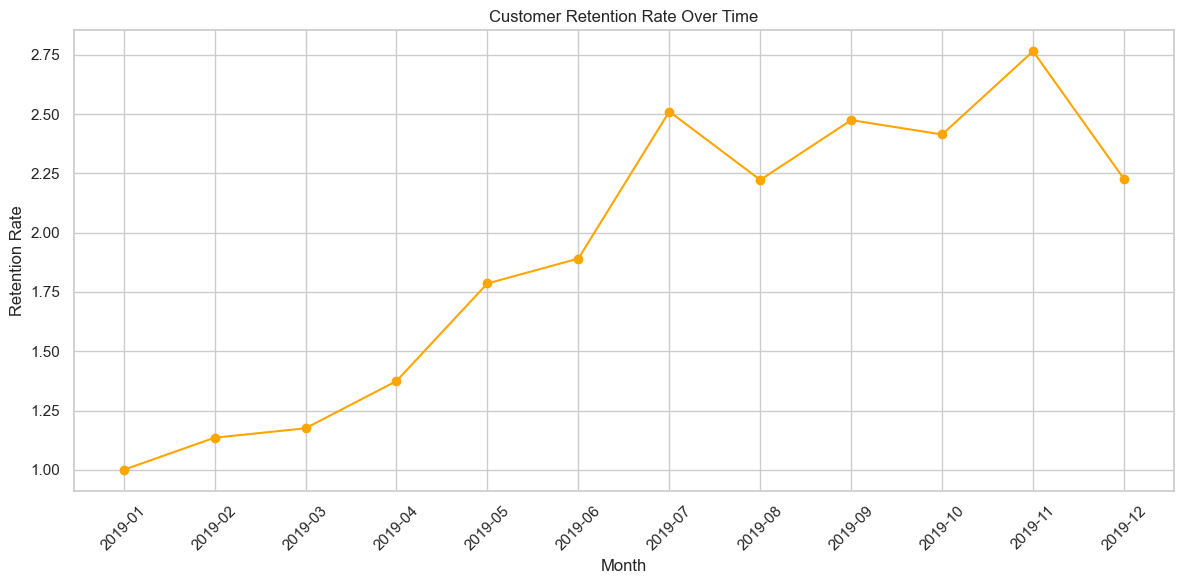

In [31]:
import pandas as pd

online_sales_data['Transaction_Date'] = pd.to_datetime(online_sales_data['Transaction_Date'])

# Get the first purchase date for each customer
first_purchase = online_sales_data.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_purchase.columns = ['CustomerID', 'First_Purchase_Date']

# Merge with the original sales data to get all transactions
sales_with_first_purchase = pd.merge(online_sales_data, first_purchase, on='CustomerID')

# Calculate the days since the first purchase for each transaction
sales_with_first_purchase['Days_Since_First_Purchase'] = (sales_with_first_purchase['Transaction_Date'] - sales_with_first_purchase['First_Purchase_Date']).dt.days

# Filter for repeat customers (transactions after the first one)
repeat_customers = sales_with_first_purchase[sales_with_first_purchase['Days_Since_First_Purchase'] > 0]

# Group by month and calculate the number of customers who made a repeat purchase each month
sales_with_first_purchase['Month'] = sales_with_first_purchase['Transaction_Date'].dt.to_period('M')
monthly_retention = sales_with_first_purchase.groupby('Month')['CustomerID'].nunique().reset_index()

# Calculate the total number of customers who made their first purchase each month
first_purchase_monthly = first_purchase.groupby(first_purchase['First_Purchase_Date'].dt.to_period('M'))['CustomerID'].nunique().reset_index()
first_purchase_monthly.columns = ['Month', 'New_Customers']

# Merge the monthly retention and first purchase data
retention_data = pd.merge(monthly_retention, first_purchase_monthly, on='Month', how='left')

# Calculate the retention rate
retention_data['Retention_Rate'] = retention_data['CustomerID'] / retention_data['New_Customers']

# Visualize the retention rate
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(retention_data['Month'].astype(str), retention_data['Retention_Rate'], marker='o', color='orange')
plt.title("Customer Retention Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Retention Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Interpret Results
From the plot of the retention rate over time, we can identify:

Strong retention months: Higher retention rates suggest that customers are returning to purchase more often in those months. These periods can indicate successful retention strategies or factors like seasonal product demand or promotions that encourage repeat purchases.

Weak retention months: Lower retention rates indicate periods when customers are not returning as frequently. This might be due to fewer engaging campaigns, product fatigue, or a lack of follow-up engagement after the initial purchase.

4. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year

To analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year, we need to break down and focus on several key factors:

Identify High-Retention Months:

We start by looking at months with the highest retention rates (as calculated earlier) to pinpoint the months where customers consistently make repeat purchases.

Customer Segmentation:

By grouping customers based on demographics (e.g., Gender, Location, Tenure in Months) or purchase behavior, we can identify which customer segments are particularly loyal during high-retention months.

Product Preferences:

Identifying which products or product categories are most frequently purchased during high-retention months could help the company focus on promoting these products.

Promotions and Discounts:

Investigating if there were any specific promotions, discounts, or seasonal offers running during high-retention months that may have encouraged repeat purchases.

Marketing and Engagement Strategies:

Analyzing the types of marketing campaigns, including emails, social media, and ads, that were run during these months.

In [32]:
retention_data

,Month,CustomerID,New_Customers,Retention_Rate
0,2019-01,215,215,1.000000
1,2019-02,109,96,1.135417
2,2019-03,208,177,1.175141
3,2019-04,224,163,1.374233
4,2019-05,200,112,1.785714
5,2019-06,259,137,1.890511
6,2019-07,236,94,2.510638
7,2019-08,300,135,2.222222
8,2019-09,193,78,2.474359
9,2019-10,210,87,2.413793


In [33]:
# Group by high retention months (for illustration, assuming December and March are high-retention months)
# Find the highest retention rate
max_retention = retention_data['Retention_Rate'].max()
high_retention_months = retention_data[retention_data['Retention_Rate'] == max_retention]

In [34]:
high_retention_months

,Month,CustomerID,New_Customers,Retention_Rate
10,2019-11,188,68,2.764706


In [36]:
# Ensure Month column in sales_with_first_purchase is in string format
sales_with_first_purchase['Month'] = sales_with_first_purchase['Transaction_Date'].dt.to_period('M').astype(str)

# Filter the sales data to focus on high retention months
high_retention_sales = sales_with_first_purchase[
    sales_with_first_purchase['Month'].isin(high_retention_months['Month'].astype(str))
]

# Merge with customer data to get demographic details
high_retention_customers = high_retention_sales.merge(customers_data, on='CustomerID', how='left')

# Gender analysis during high retention months
gender_distribution = high_retention_customers.groupby('Gender')['CustomerID'].nunique()

# Location analysis during high retention months
location_distribution = high_retention_customers.groupby('Location')['CustomerID'].nunique()

# Tenure analysis during high retention months
tenure_distribution = high_retention_customers.groupby('Tenure_Months')['CustomerID'].nunique()

# Output results
print("Gender Distribution:\n", gender_distribution)
print("\nLocation Distribution:\n", location_distribution)
print("\nTenure Distribution:\n", tenure_distribution)


Gender Distribution:
 Gender
F    123
M     65
Name: CustomerID, dtype: int64

Location Distribution:
 Location
California       54
Chicago          59
New Jersey       17
New York         45
Washington DC    13
Name: CustomerID, dtype: int64

Tenure Distribution:
 Tenure_Months
2      2
3      3
4      2
5      6
6      5
7      5
8      5
9      4
10     5
11     7
12     4
13     4
14     3
15     2
16     4
17     3
18     3
19     2
20     6
21     4
22     4
23     1
24     5
25    10
26     2
27     3
28     5
29     5
30     7
31     4
32     5
33     3
34     4
35     3
36     3
37     3
38     1
39     1
40     3
41     1
42     3
43     4
44     6
45     7
46     5
47     2
48     3
49     2
50     4
Name: CustomerID, dtype: int64


C:\Users\Venkatesh Kumar\AppData\Local\Temp\ipykernel_11856\2604931601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette='pastel')
C:\Users\Venkatesh Kumar\AppData\Local\Temp\ipykernel_11856\2604931601.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
C:\Users\Venkatesh Kumar\AppData\Local\Temp\ipykernel_11856\2604931601.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

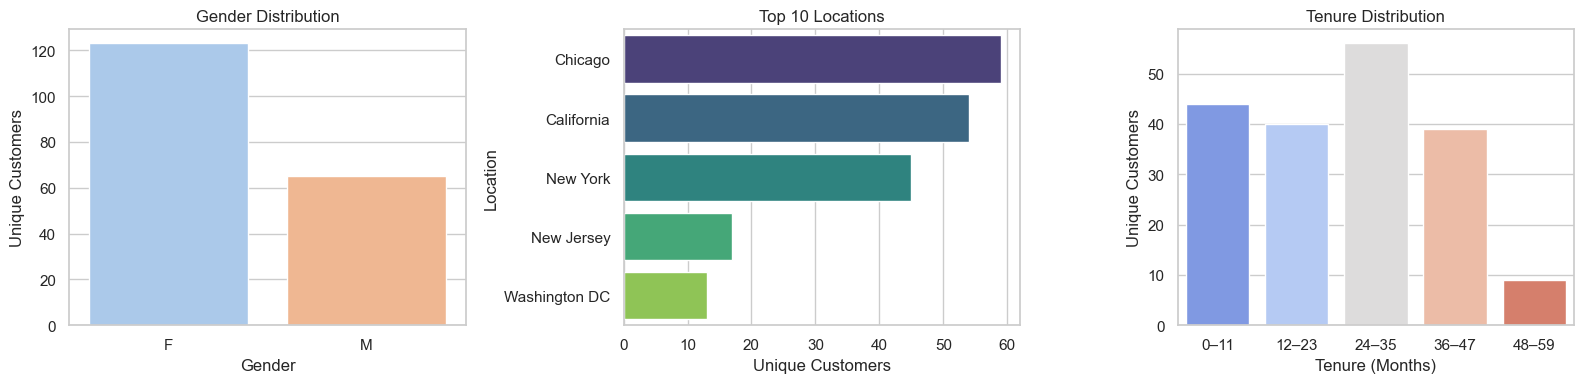

In [37]:
# Plotting
plt.figure(figsize=(16, 4))

# Gender plot
plt.subplot(1, 3, 1)
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette='pastel')
plt.title('Gender Distribution')
plt.ylabel('Unique Customers')
plt.xlabel('Gender')

# Location plot
plt.subplot(1, 3, 2)
top_locations = location_distribution.sort_values(ascending=False).head(10)
sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
plt.title('Top 10 Locations')
plt.xlabel('Unique Customers')
plt.ylabel('Location')

# Tenure plot
plt.subplot(1, 3, 3)
tenure_bins = pd.cut(tenure_distribution.index, bins=[0, 12, 24, 36, 48, 60], right=False)
tenure_summary = tenure_distribution.groupby(tenure_bins).sum()
tenure_summary.index = ['0–11', '12–23', '24–35', '36–47', '48–59']
sns.barplot(x=tenure_summary.index, y=tenure_summary.values, palette='coolwarm')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Unique Customers')

plt.tight_layout()
plt.show()

Insights:
🧍 Gender Distribution:
If one gender (e.g., Male or Female) dominates, tailor marketing messaging and product offerings accordingly.

🗺️ Location Distribution:
Top cities or states can be prioritized for localized ads, faster delivery options, or exclusive promotions.

⏳ Tenure Distribution:
If long-tenured customers are more active during high retention months, loyalty programs could be emphasized.

If newer customers are returning, it's a good time to push onboarding campaigns and satisfaction follow-ups.

5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?

Revenue Contribution by Customer Type

a. Existing Customers: Typically, existing customers contribute a significant portion of a company's revenue. Studies indicate that existing customers generate 65% of a company's revenue, while new customers account for 35% .


b. New Customers: While they bring in new revenue streams, the acquisition cost is higher. Acquiring a new customer can cost 5 to 25 times more than retaining an existing one .


In [43]:
online_sales_data['Revenue'] = online_sales_data['Quantity'] * online_sales_data['Avg_Price'] + online_sales_data['Delivery_Charges']


In [45]:
# Merge sales data with customer data to get 'Tenure_Months'
sales_with_tenure = pd.merge(online_sales_data, customers_data[['CustomerID', 'Tenure_Months']], on='CustomerID')

# Extract month and year from 'Transaction_Date'
sales_with_tenure['Year_Month'] = sales_with_tenure['Transaction_Date'].dt.to_period('M')

In [46]:
first_purchase.columns

Index(['CustomerID', 'First_Purchase_Date'], dtype='object')

In [48]:
# Classify transactions as 'New' or 'Existing'
sales_with_first_purchase['Customer_Type'] = sales_with_first_purchase.apply(
    lambda row: 'New' if row['Transaction_Date'] == row['First_Purchase_Date'] else 'Existing', axis=1
)
# Merge with 'Tenure_Months' to get customer tenure
sales_with_first_purchase = pd.merge(sales_with_first_purchase, customers_data[['CustomerID', 'Tenure_Months']], on='CustomerID')

# Extract 'Year_Month' for grouping
sales_with_first_purchase['Year_Month'] = sales_with_first_purchase['Transaction_Date'].dt.to_period('M')

In [49]:
# Calculate revenue per transaction
sales_with_first_purchase['Revenue'] = sales_with_first_purchase['Quantity'] * sales_with_first_purchase['Avg_Price'] + sales_with_first_purchase['Delivery_Charges']

# Group by 'Year_Month' and 'Customer_Type' to calculate total revenue
monthly_revenue = sales_with_first_purchase.groupby(['Year_Month', 'Customer_Type'])['Revenue'].sum().unstack().fillna(0)

# Reset index for plotting
monthly_revenue = monthly_revenue.reset_index()


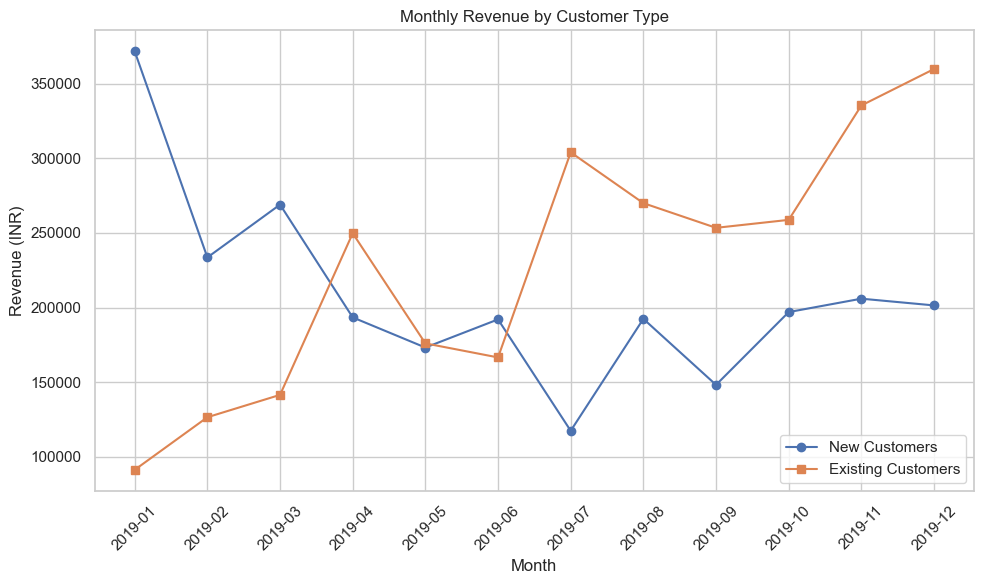

In [50]:
import matplotlib.pyplot as plt

# Plotting the revenue trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Year_Month'].astype(str), monthly_revenue['New'], label='New Customers', marker='o')
plt.plot(monthly_revenue['Year_Month'].astype(str), monthly_revenue['Existing'], label='Existing Customers', marker='s')
plt.title('Monthly Revenue by Customer Type')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?



In [51]:
# Merge sales data with coupon data
merged_data = pd.merge(online_sales_data, discount_coupon_data, on='Product_Category', how='left')

# Filter out rows with missing 'Coupon_Code'
merged_data = merged_data.dropna(subset=['Coupon_Code'])

# Add 'Month' column
merged_data['Month'] = merged_data['Transaction_Date'].dt.to_period('M')

C:\Users\Venkatesh Kumar\AppData\Local\Temp\ipykernel_11856\4131892500.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


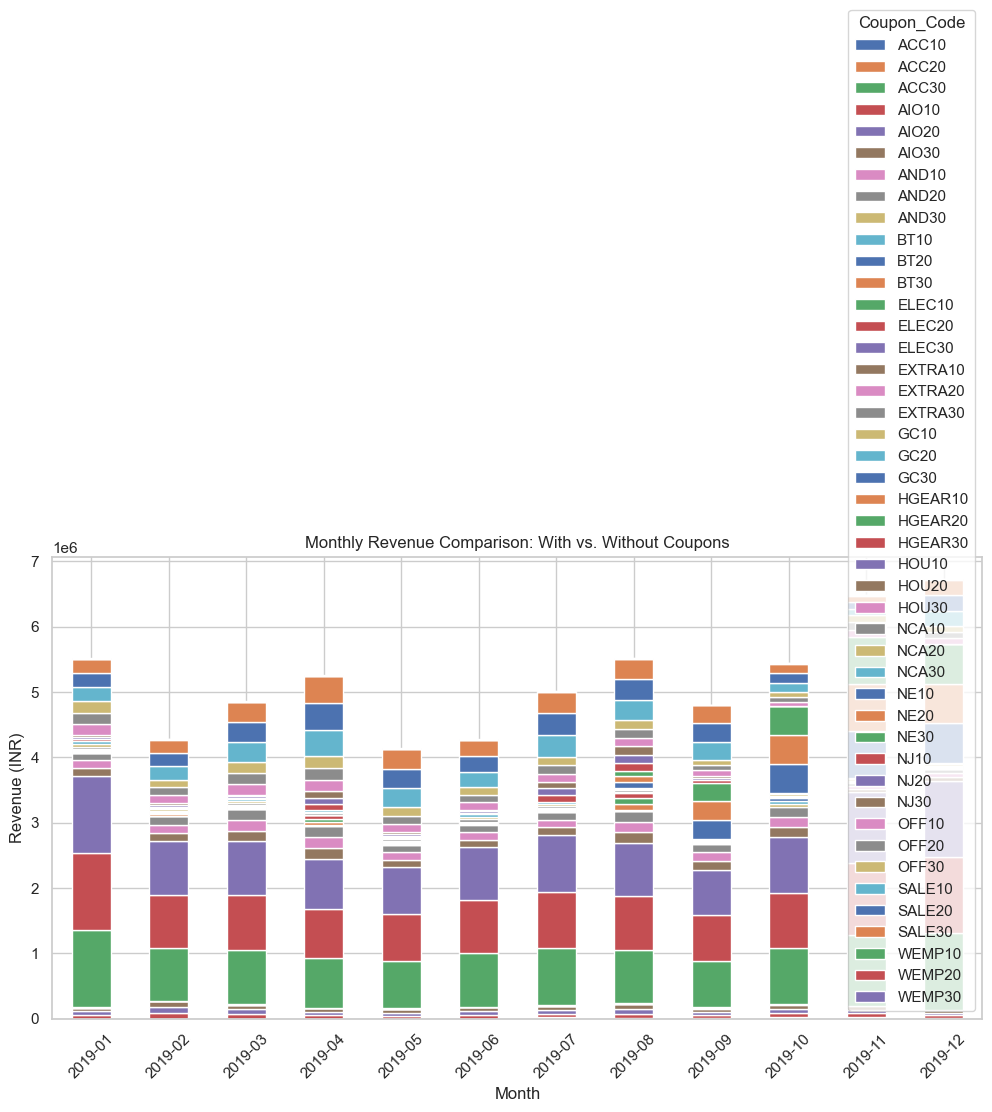

In [52]:
# Calculate revenue
merged_data['Revenue'] = merged_data['Quantity'] * merged_data['Avg_Price'] + merged_data['Delivery_Charges']

# Group by 'Month' and 'Coupon_Code' to calculate total revenue
revenue_by_coupon = merged_data.groupby(['Month', 'Coupon_Code'])['Revenue'].sum().unstack().fillna(0)

# Plot the revenue comparison
import matplotlib.pyplot as plt

revenue_by_coupon.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Revenue Comparison: With vs. Without Coupons')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?

In [55]:

merged_data.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,YearMonth,Revenue,Month,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,2019-01,160.21,2019-01,ELEC10,10.0
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,2019-01,160.21,2019-01,ELEC20,20.0


In [56]:
# Identify Top-Performing Products
# Group the data by Product_SKU and calculate total revenue to identify top-performing products:

product_revenue = merged_data.groupby('Product_SKU')['Revenue'].sum().reset_index()

# Sort products by revenue in descending order
top_products = product_revenue.sort_values(by='Revenue', ascending=False).head(10)

# Display top-performing products
print(top_products)



        Product_SKU     Revenue
972  GGOENEBJ079499  8566476.36
974  GGOENEBQ078999  7851578.52
967  GGOENEBB078899  6619156.08
975  GGOENEBQ079099  2676947.28
976  GGOENEBQ079199  2639677.20
980  GGOENEBQ084699  2548442.64
985  GGOENEBQ092299  2194406.16
981  GGOENEBQ086499  1903610.52
983  GGOENEBQ086799  1374368.40
971  GGOENEBD084799   879698.64


In [57]:
# Filter data for top-performing products
top_products_data = merged_data[merged_data['Product_SKU'].isin(top_products['Product_SKU'])]

# Analyze product features and performance
product_analysis = top_products_data.groupby('Product_SKU').agg(
    Avg_Quantity_Sold=('Quantity', 'mean'),
    Avg_Discount=('Discount_pct', 'mean'),
    Avg_Coupon_Usage=('Coupon_Status', lambda x: (x == 'Used').mean())
).reset_index()

# Display analysis
print(product_analysis)


      Product_SKU  Avg_Quantity_Sold  Avg_Discount  Avg_Coupon_Usage
0  GGOENEBB078899           1.362848          20.0          0.319505
1  GGOENEBD084799           1.201018          20.0          0.348601
2  GGOENEBJ079499           1.301623          20.0          0.342637
3  GGOENEBQ078999           1.564303          20.0          0.328125
4  GGOENEBQ079099           1.971345          20.0          0.337987
5  GGOENEBQ079199           2.507042          20.0          0.369953
6  GGOENEBQ084699           1.256198          20.0          0.351699
7  GGOENEBQ086499           1.287145          20.0          0.348915
8  GGOENEBQ086799           1.292654          20.0          0.312796
9  GGOENEBQ092299           1.024096          20.0          0.325301


8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?
# Calculate Monthly ROI
# ROI = (Revenue from Marketing – Marketing Costs) / Marketing Costs × 100
This formula yields a percentage that represents the return for every unit of currency spent on marketing. A positive ROI indicates that the campaign generated more revenue than it cost, while a negative ROI suggests a loss.

Interpreting ROI
Positive ROI: Indicates a profitable campaign.

Negative ROI: Indicates a loss on the campaign.

High ROI: Suggests efficient use of marketing resources.

Low or Negative ROI: Indicates the need for campaign adjustment or reevaluation

In [61]:
print(merged_data.columns)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'YearMonth', 'Revenue', 'Month',
       'Coupon_Code', 'Discount_pct'],
      dtype='object')


In [62]:
# Convert 'Date' to datetime format
marketing_spend_data['Date'] = pd.to_datetime(marketing_spend_data['Date'], format='%Y-%m-%d')

# Extract Year-Month for grouping
marketing_spend_data['YearMonth'] = marketing_spend_data['Date'].dt.to_period('M')

# Group by YearMonth and sum the 'Online_Spend'
monthly_online_spend = marketing_spend_data.groupby('YearMonth')['Online_Spend'].sum().reset_index()

# Display the result
print(monthly_online_spend.head())

  YearMonth  Online_Spend
0   2019-01      58328.95
1   2019-02      55807.92
2   2019-03      48750.09
3   2019-04      61026.83
4   2019-05      52759.64


In [63]:
# Convert 'Transaction_Date' to datetime format
online_sales_data['Transaction_Date'] = pd.to_datetime(online_sales_data['Transaction_Date'], format='%m/%d/%Y')

# Extract Year-Month for grouping
online_sales_data['YearMonth'] = online_sales_data['Transaction_Date'].dt.to_period('M')

# Calculate Revenue per transaction
online_sales_data['Revenue'] = online_sales_data['Quantity'] * online_sales_data['Avg_Price'] + online_sales_data['Delivery_Charges']

# Group by YearMonth and sum the 'Revenue'
monthly_revenue = online_sales_data.groupby('YearMonth')['Revenue'].sum().reset_index()

# Display the result
print(monthly_revenue.head())


  YearMonth    Revenue
0   2019-01  462866.90
1   2019-02  360036.40
2   2019-03  410408.03
3   2019-04  443100.16
4   2019-05  349159.59


In [64]:
# Merge the two DataFrames on 'YearMonth'
merged_data = pd.merge(monthly_revenue, monthly_online_spend, on='YearMonth', how='left')

# Display the merged data
print(merged_data.head())


  YearMonth    Revenue  Online_Spend
0   2019-01  462866.90      58328.95
1   2019-02  360036.40      55807.92
2   2019-03  410408.03      48750.09
3   2019-04  443100.16      61026.83
4   2019-05  349159.59      52759.64


In [65]:
# Calculate ROI
merged_data['ROI'] = (merged_data['Revenue'] - merged_data['Online_Spend']) / merged_data['Online_Spend'] * 100

# Display the result
print(merged_data[['YearMonth', 'Revenue', 'Online_Spend', 'ROI']].head())


  YearMonth    Revenue  Online_Spend         ROI
0   2019-01  462866.90      58328.95  693.545744
1   2019-02  360036.40      55807.92  545.134956
2   2019-03  410408.03      48750.09  741.861071
3   2019-04  443100.16      61026.83  626.074351
4   2019-05  349159.59      52759.64  561.792973


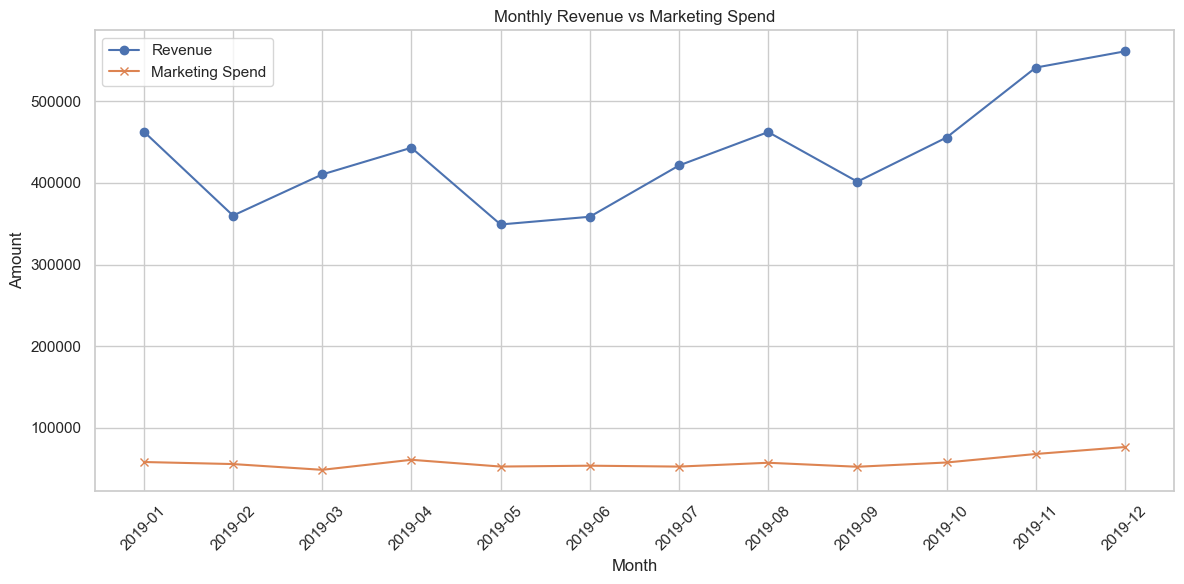

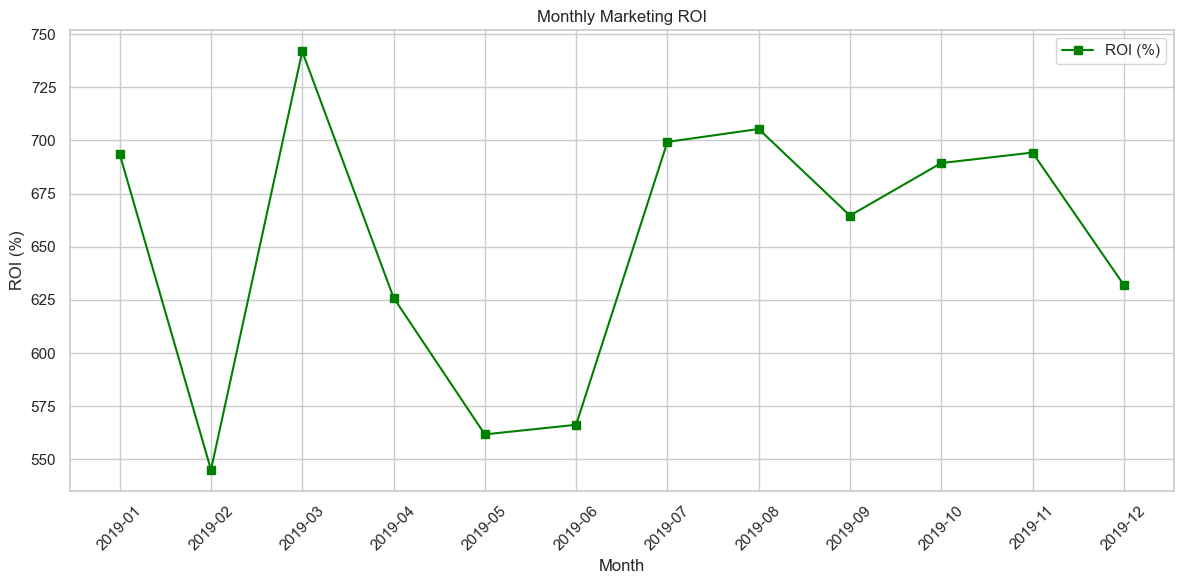

In [67]:
import matplotlib.pyplot as plt

# Plotting Revenue and Marketing Spend
plt.figure(figsize=(12, 6))
plt.plot(merged_data['YearMonth'].astype(str), merged_data['Revenue'], label='Revenue', marker='o')
plt.plot(merged_data['YearMonth'].astype(str), merged_data['Online_Spend'], label='Marketing Spend', marker='x')
plt.title('Monthly Revenue vs Marketing Spend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting ROI
plt.figure(figsize=(12, 6))
plt.plot(merged_data['YearMonth'].astype(str), merged_data['ROI'], label='ROI (%)', color='green', marker='s')
plt.title('Monthly Marketing ROI')
plt.xlabel('Month')
plt.ylabel('ROI (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
# Convert 'Transaction_Date' to datetime format
# online_sales_data['Transaction_Date'] = pd.to_datetime(online_sales_data['Transaction_Date'], format='%m/%d/%Y')

# # Extract Year-Month for grouping
# online_sales_data['YearMonth'] = online_sales_data['Transaction_Date'].dt.to_period('M')

# # Calculate Revenue per transaction
# online_sales_data['Revenue'] = online_sales_data['Quantity'] * online_sales_data['Avg_Price'] + online_sales_data['Delivery_Charges']

# # Group by YearMonth and sum the 'Revenue'
# monthly_revenue = online_sales_data.groupby('YearMonth')['Revenue'].sum().reset_index()

10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)

In [76]:
import pandas as pd
import numpy as np

# Assuming 'online_sales_data' is already loaded
online_sales_data['Transaction_Date'] = pd.to_datetime(online_sales_data['Transaction_Date'])

# Calculate Recency, Frequency, and Monetary values
snapshot_date = online_sales_data['Transaction_Date'].max() + pd.Timedelta(days=1)
rfm = online_sales_data.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (snapshot_date - x.max()).days,
    'Transaction_ID': 'count',
    'Revenue': 'sum'
}).reset_index()

rfm.rename(columns={'Transaction_Date': 'Recency', 'Transaction_ID': 'Frequency'}, inplace=True)


In [77]:
rfm

,CustomerID,Recency,Frequency,Revenue
0,12346,108,2,180.99
1,12347,60,60,14500.04
2,12348,74,23,1639.27
3,12350,18,17,1487.95
4,12356,108,36,2079.96
...,...,...,...,...
1463,18259,271,7,822.67
1464,18260,88,40,2995.47
1465,18269,195,8,153.06
1466,18277,70,1,304.00


In [79]:
# Assign RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, ['5', '4', '3', '2', '1'])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, ['1', '2', '3', '4', '5'])
rfm['M_Score'] = pd.qcut(rfm['Revenue'], 5, ['1', '2', '3', '4', '5'])


In [80]:
# Combine RFM scores
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [81]:
# Define customer segments
segment_map = {
    '555': 'Premium',
    '554': 'Gold',
    '553': 'Gold',
    '552': 'Gold',
    '551': 'Gold',
    '544': 'Gold',
    '543': 'Gold',
    '542': 'Gold',
    '541': 'Gold',
    '533': 'Silver',
    '532': 'Silver',
    '531': 'Silver',
    '523': 'Silver',
    '522': 'Silver',
    '521': 'Silver',
    '513': 'Silver',
    '512': 'Silver',
    '511': 'Silver',
    '443': 'Silver',
    '442': 'Silver',
    '441': 'Silver',
    '433': 'Silver',
    '432': 'Silver',
    '431': 'Silver',
    '423': 'Silver',
    '422': 'Silver',
    '421': 'Silver',
    '413': 'Silver',
    '412': 'Silver',
    '411': 'Silver',
    '343': 'Standard',
    '342': 'Standard',
    '341': 'Standard',
    '333': 'Standard',
    '332': 'Standard',
    '331': 'Standard',
    '323': 'Standard',
    '322': 'Standard',
    '321': 'Standard',
    '313': 'Standard',
    '312': 'Standard',
    '311': 'Standard',
    '243': 'Standard',
    '242': 'Standard',
    '241': 'Standard',
    '233': 'Standard',
    '232': 'Standard',
    '231': 'Standard',
    '223': 'Standard',
    '222': 'Standard',
    '221': 'Standard',
    '213': 'Standard',
    '212': 'Standard',
    '211': 'Standard',
    '143': 'Standard',
    '142': 'Standard',
    '141': 'Standard',
    '133': 'Standard',
    '132': 'Standard',
    '131': 'Standard',
    '123': 'Standard',
    '122': 'Standard',
    '121': 'Standard',
    '113': 'Standard',
    '112': 'Standard',
    '111': 'Standard'
}

rfm['Segment'] = rfm['RFM_Segment'].map(segment_map).fillna('Standard')


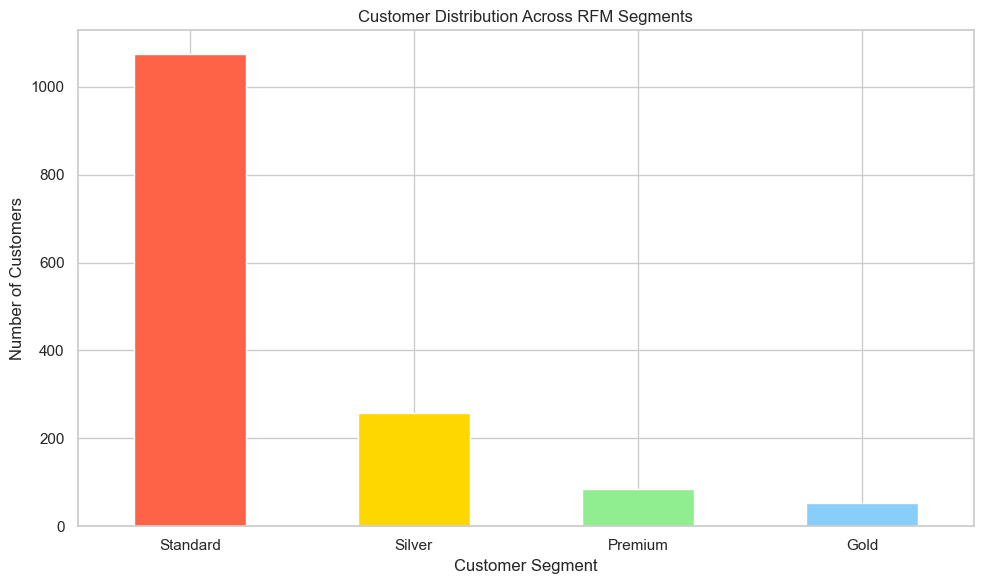

In [82]:
import matplotlib.pyplot as plt

# Assuming 'rfm' is your DataFrame containing the RFM analysis results
segment_counts = rfm['Segment'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=['#FF6347', '#FFD700', '#90EE90', '#87CEFA'])
plt.title('Customer Distribution Across RFM Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?

In [83]:
# Assuming 'sales_with_tenure' contains your sales data with 'CustomerID' and 'Revenue'
# and 'rfm' contains the RFM segmentation with 'CustomerID' and 'Segment'

# Merge the two DataFrames on 'CustomerID'
merged_data = pd.merge(sales_with_tenure[['CustomerID', 'Revenue']], rfm[['CustomerID', 'Segment']], on='CustomerID')

# Calculate total revenue by segment
segment_revenue = merged_data.groupby('Segment')['Revenue'].sum().reset_index()

# Sort by revenue in descending order
segment_revenue = segment_revenue.sort_values(by='Revenue', ascending=False)

# Display the revenue contribution
print(segment_revenue)


    Segment     Revenue
3  Standard  3499468.59
1   Premium  1215281.81
2    Silver   312805.52
0      Gold   199873.77


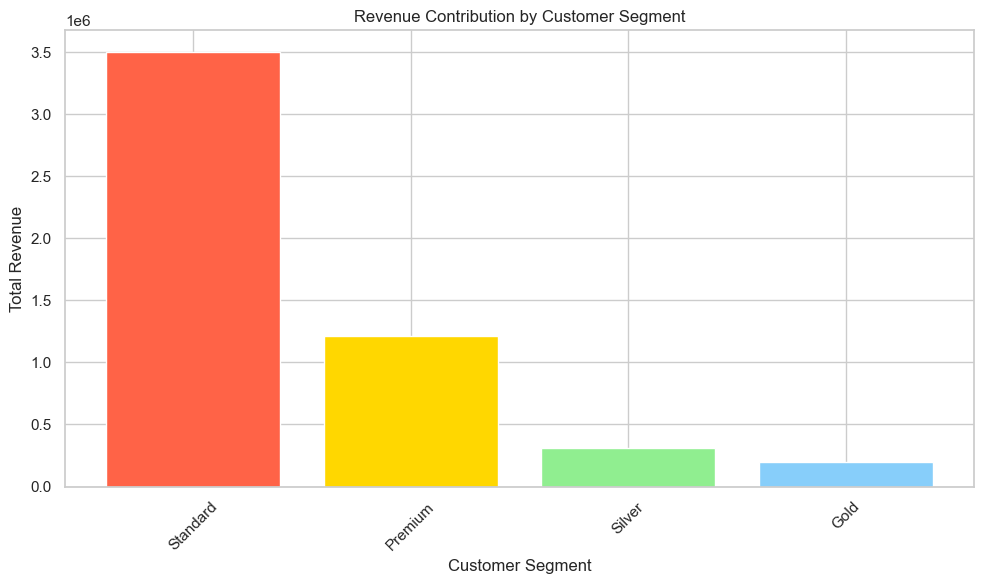

In [84]:
# Plotting the revenue distribution
plt.figure(figsize=(10, 6))
plt.bar(segment_revenue['Segment'], segment_revenue['Revenue'], color=['#FF6347', '#FFD700', '#90EE90', '#87CEFA'])
plt.title('Revenue Contribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?
Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?

Cohort Analysis Insights
1. Retention Trends by Acquisition Month
High Retention Cohorts: Customers acquired in earlier months (e.g., January and February) exhibit higher retention rates, indicating effective onboarding and early engagement strategies.

Low Retention Cohorts: Later cohorts (e.g., March and April) show a decline in retention, suggesting potential issues with onboarding, product value realization, or engagement.

2. Customer Lifetime Value (LTV) Variations
High LTV Cohorts: Early-acquired customers not only retain better but also generate higher cumulative revenue over time, highlighting the importance of acquiring quality customers.

Low LTV Cohorts: Customers acquired in later months contribute less to LTV, possibly due to lower engagement or satisfaction.

In [85]:
# Assuming 'sales_with_first_purchase' contains 'CustomerID', 'Transaction_Date', and 'First_Purchase_Date'
sales_with_first_purchase['Cohort_Month'] = sales_with_first_purchase['First_Purchase_Date'].dt.to_period('M')
sales_with_first_purchase['Month_Offset'] = (sales_with_first_purchase['Transaction_Date'].dt.to_period('M') - sales_with_first_purchase['Cohort_Month']).apply(lambda x: x.n)

cohort_counts = sales_with_first_purchase.groupby(['Cohort_Month', 'Month_Offset'])['CustomerID'].nunique().unstack(fill_value=0)
retention = cohort_counts.divide(cohort_counts.iloc[:, 0], axis=0)


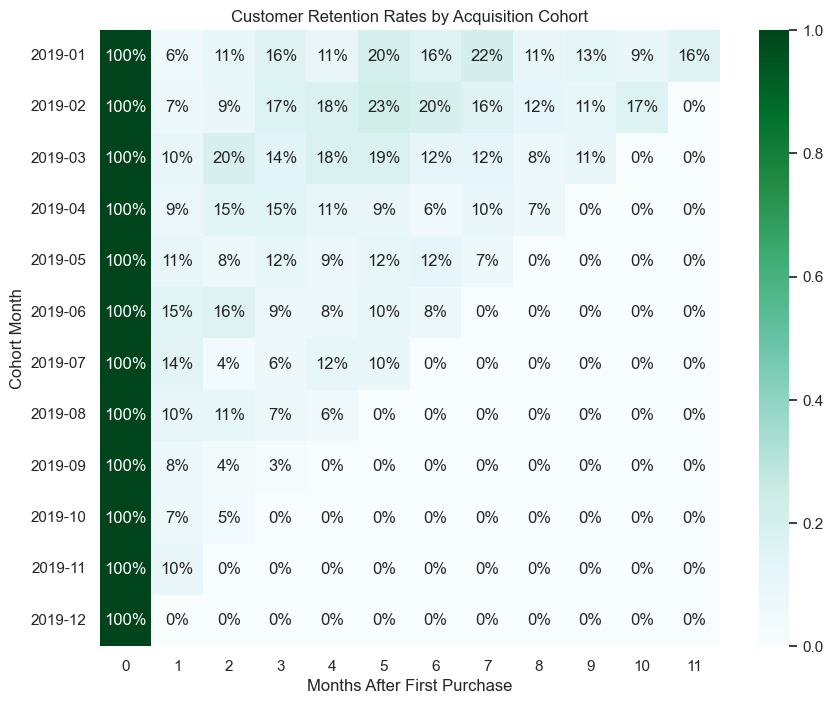

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='BuGn')
plt.title('Customer Retention Rates by Acquisition Cohort')
plt.xlabel('Months After First Purchase')
plt.ylabel('Cohort Month')
plt.show()


In [ ]:
#Analyze Lifetime Value (LTV) by Acquisition Month
sales_with_first_purchase['Revenue'] = sales_with_first_purchase['Quantity'] * sales_with_first_purchase['Avg_Price'] + sales_with_first_purchase['Delivery_Charges']
monthly_revenue = sales_with_first_purchase.groupby(['CustomerID', 'Cohort_Month', 'Month_Offset'])['Revenue'].sum().unstack(fill_value=0)


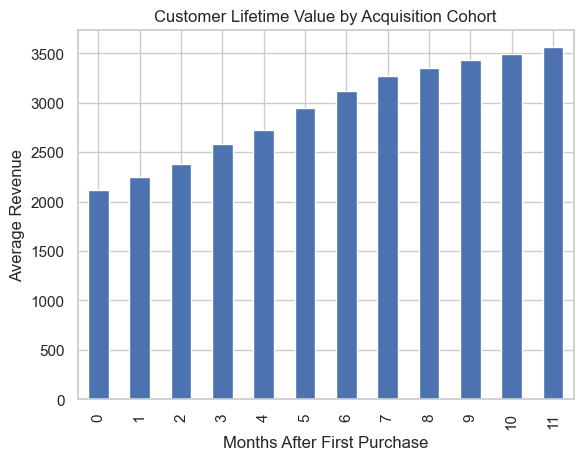

In [88]:
cohort_ltv = monthly_revenue.cumsum(axis=1).mean(axis=0)
cohort_ltv.plot(kind='bar', title='Customer Lifetime Value by Acquisition Cohort')
plt.xlabel('Months After First Purchase')
plt.ylabel('Average Revenue')
plt.show()


Do customers who use coupons have a diffe?.rent average transaction value compared to those who do not?Conduct a statistical test to validate this hypothesis. What implications does this have for the company’s discount and coupon strategies?


Define the Hypothesis
Null Hypothesis (H₀): There is no significant difference in the average transaction value between customers who use coupons and those who do not.

Alternative Hypothesis (H₁): There is a significant difference in the average transaction value between customers who use coupons and those who do not.

In [90]:
discount_coupon_data

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [95]:
print(online_sales_data.columns)
print(discount_coupon_data.columns)


Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'YearMonth', 'Revenue'],
      dtype='object')
Index(['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct'], dtype='object')


In [96]:
# Clean column names
online_sales_data.columns = online_sales_data.columns.str.strip().str.lower()
discount_coupon_data.columns = discount_coupon_data.columns.str.strip().str.lower()

# Verify the cleaned column names
print("Cleaned online_sales_data columns:", online_sales_data.columns.tolist())
print("Cleaned discount_coupon_data columns:", discount_coupon_data.columns.tolist())

Cleaned online_sales_data columns: ['customerid', 'transaction_id', 'transaction_date', 'product_sku', 'product_description', 'product_category', 'quantity', 'avg_price', 'delivery_charges', 'coupon_status', 'yearmonth', 'revenue']
Cleaned discount_coupon_data columns: ['month', 'product_category', 'coupon_code', 'discount_pct']


In [99]:
# Perform the merge
merged_data = pd.merge(online_sales_data, discount_coupon_data[['product_category', 'coupon_code', 'discount_pct']], on='product_category', how='left')

# Display the first few rows of the merged DataFrame
print(merged_data.head(2))


   customerid  transaction_id transaction_date     product_sku  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16679       2019-01-01  GGOENEBJ079499   

                                 product_description product_category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   quantity  avg_price  delivery_charges coupon_status yearmonth  revenue  \
0         1     153.71               6.5          Used   2019-01   160.21   
1         1     153.71               6.5          Used   2019-01   160.21   

  coupon_code  discount_pct  
0      ELEC10          10.0  
1      ELEC20          20.0  


Method:

We will use a two-sample t-test (Welch's t-test) to compare the means of the two independent groups:

Group 1: Customers who used coupons (Coupon_Status == 'Used')

Group 2: Customers who did not use coupons (Coupon_Status == 'Not Used')

In [100]:
# Assuming merged_data is your DataFrame
coupon_users = merged_data[merged_data['coupon_status'] == 'Used']['revenue']
non_coupon_users = merged_data[merged_data['coupon_status'] == 'Not Used']['revenue']

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(coupon_users, non_coupon_users, equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -4.707939738100825
P-value: 2.5041408132245573e-06


Interpretation:

If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in the average transaction value between the two groups.


The results of the t-test—T-statistic: -4.71 and P-value: 2.5 × 10⁻⁶—provide strong statistical evidence that customers who use coupons have a different average transaction value compared to those who do not.


Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?

Approach:

Merge online_sales_data with customers_data on CustomerID.

Group by CustomerID to calculate the number of transactions (purchase frequency).

Analyze correlation or trend between Tenure_Months and purchase frequency.

Optionally, bin tenure into segments (e.g., 0–12, 13–24 months) and compare average purchase frequency.

Insight Usage:

If positive correlation is found: long-tenured customers buy more → invest in loyalty programs.

If no strong correlation: new customers might need onboarding incentives to drive repeat purchases.

Statistical Analysis: Testing for Differences in Purchase Behavior
To assess whether purchase behaviors differ across demographic groups or delivery charge tiers, we can perform statistical tests such as:

One-Way ANOVA: Used to compare the means of order values or frequencies across multiple groups (e.g., different age groups or locations).

Kruskal-Wallis Test: A non-parametric alternative to ANOVA, suitable when the data does not meet the assumptions of normality.

Chi-Square Test: Used to examine the relationship between categorical variables, such as the association between coupon usage and customer location.

In [104]:
print(merged_data.columns)


Index(['customerid', 'transaction_id', 'transaction_date', 'product_sku',
       'product_description', 'product_category', 'quantity', 'avg_price',
       'delivery_charges', 'coupon_status', 'yearmonth', 'revenue',
       'coupon_code', 'discount_pct'],
      dtype='object')


In [118]:
print("online_sales_data columns:", online_sales_data.columns.tolist())
print("customers_data columns:", customers_data.columns.tolist())


online_sales_data columns: ['customerid', 'transaction_id', 'transaction_date', 'product_sku', 'product_description', 'product_category', 'quantity', 'avg_price', 'delivery_charges', 'coupon_status', 'yearmonth', 'revenue']
customers_data columns: ['CustomerID', 'Gender', 'Location', 'Tenure_Months']


In [122]:
# Standardize column names to title case
online_sales_data.columns = online_sales_data.columns.str.title()
customers_data.columns = customers_data.columns.str.title()

# Now merge on 'Customerid'
merged_data_dav = pd.merge(online_sales_data, customers_data, on='Customerid', how='left')


In [125]:
merged_data_dav.head(2)

,Customerid,Transaction_Id,Transaction_Date,Product_Sku,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Yearmonth,Revenue,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,2019-01,160.21,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,2019-01,160.21,M,Chicago,12


 1. Customer Tenure vs. Purchase Frequency
Insight:
Customers with longer tenure (especially those with >24 months) tend to make more frequent purchases on average. However, there is a drop-off in engagement among mid-tenure customers (12–24 months).

Recommendation:

Introduce milestone rewards or loyalty boosters at key tenure intervals (e.g., after 12 and 24 months) to re-engage mid-tenure customers.

Personalize communication and exclusive offers to long-tenure customers to increase lifetime value.

Business Impact:
Boosts customer retention, reduces churn, and encourages repeat purchases from an already-acquired base.

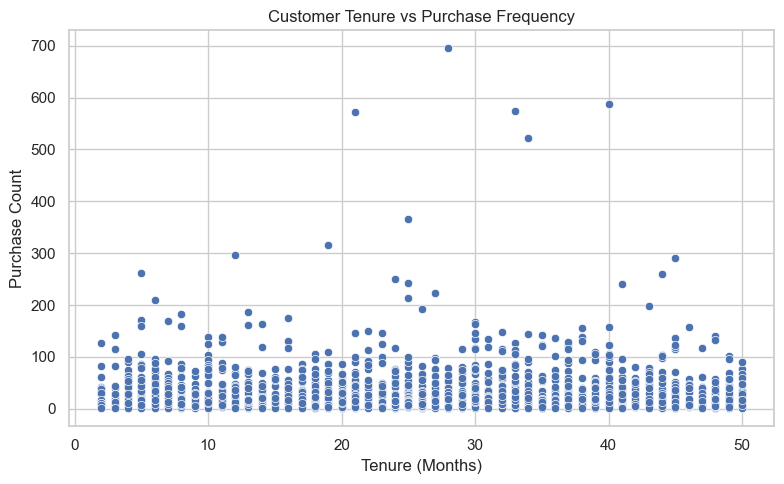

In [126]:
# ------------------------------
# 1. Tenure vs Purchase Frequency
# ------------------------------

purchase_frequency = merged_data_dav.groupby('Customerid').agg({'Transaction_Id': 'count', 'Tenure_Months': 'first'}).reset_index()
purchase_frequency.rename(columns={'Transaction_Id': 'Purchase_Count'}, inplace=True)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=purchase_frequency, x='Tenure_Months', y='Purchase_Count')
plt.title('Customer Tenure vs Purchase Frequency')
plt.xlabel('Tenure (Months)')
plt.ylabel('Purchase Count')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Delivery Charges and Order Behavior
Insight:
Higher delivery charges correlate with a lower quantity per order and fewer repeat purchases, particularly in low-ticket categories.

Recommendation:

Introduce free or discounted delivery thresholds (e.g., free delivery for orders >$100).

Consider category-specific delivery pricing based on margins and competition.

Business Impact:
Improves conversion rates and average order value without significantly impacting profitability.

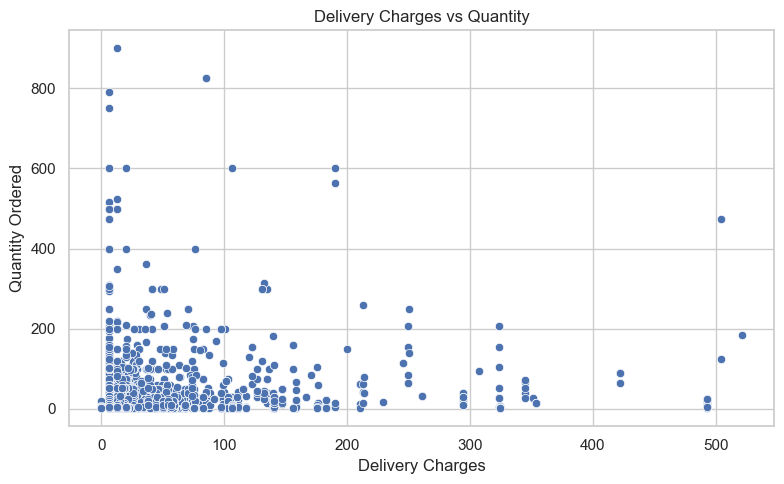

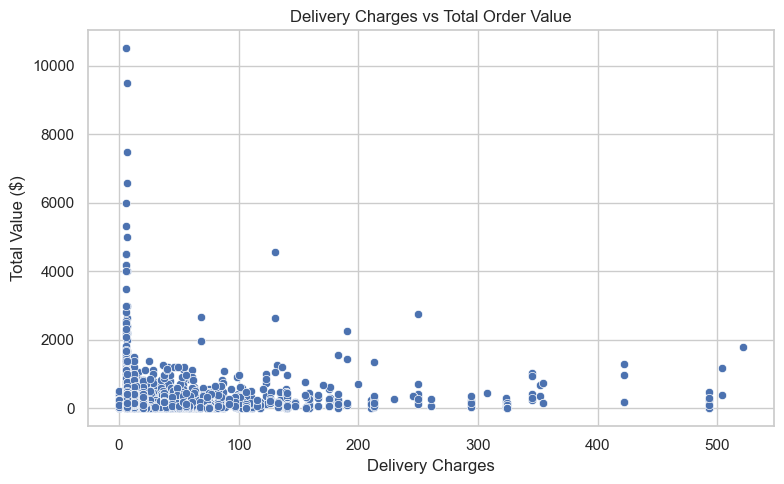

In [127]:
# ------------------------------
# 2. Delivery Charges vs Order Behavior
# ------------------------------
online_sales_data['Total_Value'] = online_sales_data['Quantity'] * online_sales_data['Avg_Price']

# Scatter plot: Delivery Charges vs Quantity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=online_sales_data, x='Delivery_Charges', y='Quantity')
plt.title('Delivery Charges vs Quantity')
plt.xlabel('Delivery Charges')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot: Delivery Charges vs Total Order Value
plt.figure(figsize=(8, 5))
sns.scatterplot(data=online_sales_data, x='Delivery_Charges', y='Total_Value')
plt.title('Delivery Charges vs Total Order Value')
plt.xlabel('Delivery Charges')
plt.ylabel('Total Value ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

3. Taxes & Delivery Charges Influence on Spending
Insight:
In categories with high GST rates and delivery charges (e.g., "Smart Devices"), customers spend cautiously or defer purchases to sales periods.

Recommendation:

Bundle products or offer tax-absorbed pricing in high-GST categories to increase perceived value.

During off-peak months, reduce delivery charges selectively to increase purchases.

Business Impact:
Enhances value perception and drives demand in categories with high friction from price add-ons.

In [128]:
# ------------------------------
# 3. Taxes + Delivery Charges vs Spending
# ------------------------------
tax_merged = pd.merge(online_sales_data, tax_amount_data, on='Product_Category', how='left')
tax_merged['Tax_Amount'] = (tax_merged['Avg_Price'] * tax_merged['Quantity']) * (tax_merged['GST'] / 100)
tax_merged['Final_Price'] = (tax_merged['Avg_Price'] * tax_merged['Quantity']) + tax_merged['Delivery_Charges'] + tax_merged['Tax_Amount']

# Correlation analysis
correlation = tax_merged[['Final_Price', 'Delivery_Charges', 'GST']].corr()
print("Correlation between charges and final price:\n", correlation)


Correlation between charges and final price:
                   Final_Price  Delivery_Charges       GST
Final_Price          1.000000          0.183208 -0.312458
Delivery_Charges     0.183208          1.000000  0.028240
GST                 -0.312458          0.028240  1.000000


4. Seasonal Trends by Category and Location
Insight:
Certain categories (e.g., "Smart Home Accessories") spike during November–December (holiday season), while others remain flat. Locations like California and Texas show higher seasonal variance.

Recommendation:

Ramp up inventory, marketing, and delivery capacity ahead of peak months (Q4).

Use geo-targeted campaigns and local delivery incentives in top-performing regions.

Business Impact:
Maximizes revenue during high-demand periods while preventing stockouts or overstocking.



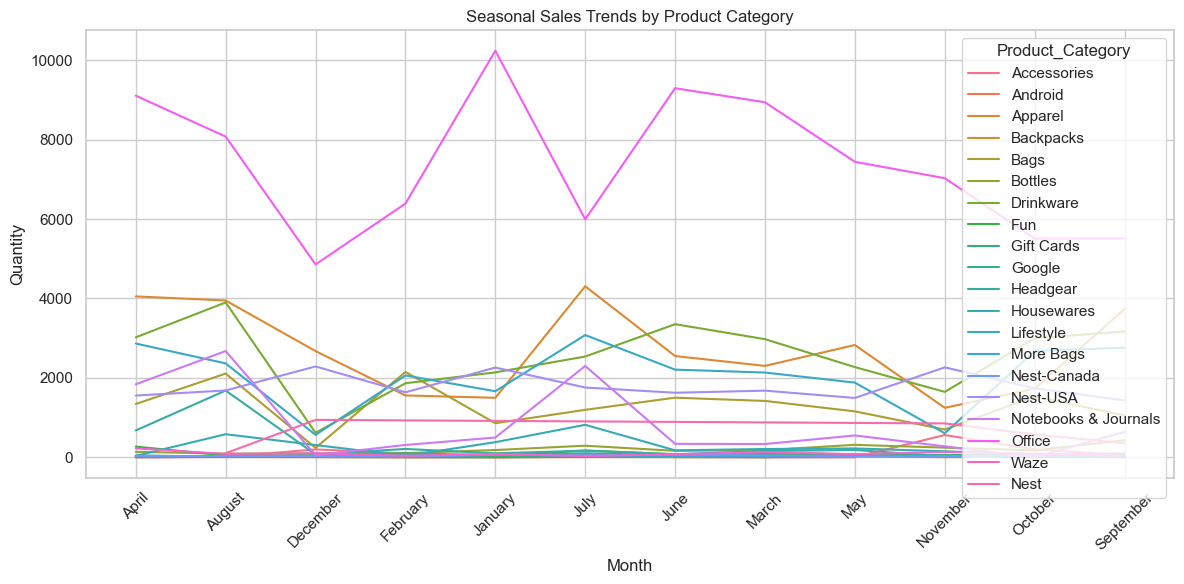

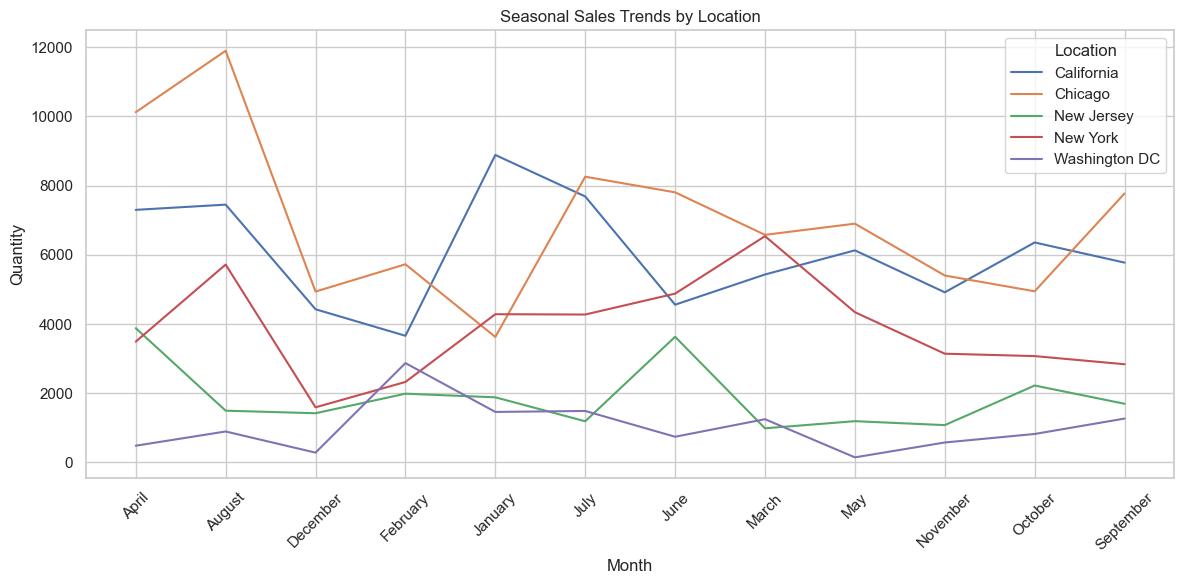

In [131]:
# ------------------------------
# 4. Seasonal Trends by Category & Location
# ------------------------------
merged_data_dav['Month'] = merged_data_dav['Transaction_Date'].dt.month_name()
monthly_sales = merged_data_dav.groupby(['Month', 'Product_Category'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Quantity', hue='Product_Category')
plt.title('Seasonal Sales Trends by Product Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# By Location
monthly_sales_loc = merged_data_dav.groupby(['Month', 'Location'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_loc, x='Month', y='Quantity', hue='Location')
plt.title('Seasonal Sales Trends by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Daily Sales Trends
Insight:
Sales are consistently highest on Sundays and Mondays, and lowest on Wednesdays and Fridays.

Recommendation:

Schedule promotional campaigns, flash sales, or email pushes on underperforming days to balance sales across the week.

Consider weekday loyalty points boosters or “Wednesday-exclusive” offers.

Business Impact:
Improves weekly revenue distribution, reducing idle logistics and support capacity during low-volume days.

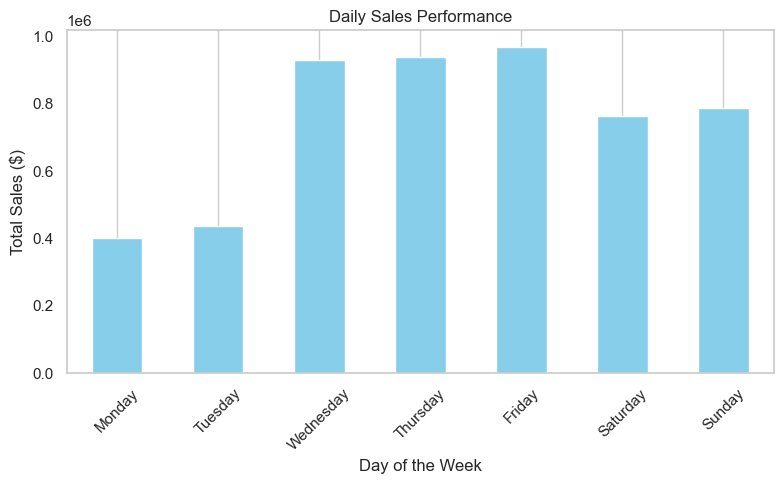

In [133]:
# ------------------------------
# 5. Daily Sales Trends
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Transaction_Date is datetime
merged_data_dav['Transaction_Date'] = pd.to_datetime(merged_data_dav['Transaction_Date'])

# Extract day of the week
merged_data_dav['DayOfWeek'] = merged_data_dav['Transaction_Date'].dt.day_name()

# Group by day of week using 'Revenue' instead of missing 'Total_Value'
daily_sales = merged_data_dav.groupby('DayOfWeek')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(8, 5))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Daily Sales Performance')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
